In [8]:
import tensorflow as tf
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

<h2>Extract MNIST data</h2>
<p style="font-size:20px">You can change the option of one_hot encoding.

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#suppress warnings
tf.logging.set_verbosity(old_v)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<h2>Define hyperparameters</h2>

In [10]:
#learning rate
lr = 0.01
#number of traning steps
num_steps = 500
#number of batch_size
batch_size = 512

<h2>Define placeholder and Variables</h2>

In [11]:
#network parameters
n_hidden_1 = 200
n_hidden_2 = 100
num_input = 784
num_classes = 10
tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.get_variable('W1',[num_input, n_hidden_1],initializer = tf.contrib.layers.xavier_initializer(seed = 1)),
    'W2': tf.get_variable('W2',[n_hidden_1, n_hidden_2],initializer = tf.contrib.layers.xavier_initializer(seed = 1)),
    'Wout': tf.get_variable('Wout',[n_hidden_2, num_classes],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}


<h2>Define neural network</h2>

In [12]:
#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.tanh(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    layer_2_out = tf.nn.tanh(tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2']))
    out = tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [13]:
#predicted labels
logits = neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')
los = []

<h2>Execute training</h2>

step 0, Accuracy= 0.426
step 100, Accuracy= 0.961
step 200, Accuracy= 0.969
step 300, Accuracy= 0.982
step 400, Accuracy= 0.986
Training finished!
Testing ACcuracy: 0.9727


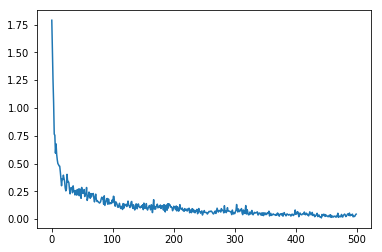

In [14]:
#Initialize the variables
init = tf.global_variables_initializer()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)  
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for i in range(num_steps):
        #fetch batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        #run optimization
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        l = sess.run(loss, feed_dict={X:batch_x, Y:batch_y})
        los.append(l)
        if i % 100 ==0:
            acc = sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y})
            print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
    print("Training finished!")
    
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
import matplotlib.pyplot as plt
plt.plot(los)
plt.show()

<h2>Your results</h2>

Parameters that contribute the most are learning rate, weight initiation method, activation function, epochs, batch size, number of hidden layers and optimization method. Optimization method, weight initiation and activation function are categorical parameters, which I prefer to decide first . I use Adam optimizer, Xavier initializer and tanh function since they work well on multi-label classification problem like MNIST. I did not change the number of hidden layer because two layers are suffcient for this network. I first choose the usual setting of lr = 0.01 and epochs  = 500. According to the cost graph, I turn up the batch size to minimize the fluncturation. It seems that greater epochs give slightly better result but costs longer time to run. Learning rate performs well at 0.01, but greater or smaller value gives bad results. The change of number of neurons does not influence the accuracy by a significant factor (512 neurons versus 100 neurons). Also, different optimizer requires different parameters to achieve optimized result. Adam with lr = 0.01 and epochs = 500 has the same result with Gradient Decesent with lr = 0.1, epochs = 3000. 